<a href="https://colab.research.google.com/github/team0243/practic/blob/main/SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [3]:
model = torchvision.models.detection.ssd300_vgg16(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:01<00:00, 93.6MB/s]


In [ ]:
model.eval()

In [5]:
!wget 'http://images.cocodataset.org/val2017/000000037777.jpg'

--2023-12-06 03:30:45--  http://images.cocodataset.org/val2017/000000037777.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.28.218, 52.217.116.145, 3.5.29.134, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.28.218|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40833 (40K) [image/jpeg]
Saving to: ‘000000037777.jpg’

000000037777.jpg    100%[===================>]  39.88K  --.-KB/s    in 0.05s   

2023-12-06 03:30:45 (753 KB/s) - ‘000000037777.jpg’ saved [40833/40833]



In [6]:
ig = Image.open("/content/000000037777.jpg")

In [8]:
transform = T.ToTensor()
img = transform(ig)

In [10]:
with torch.no_grad():
  pred = model([img])

In [13]:
pred[0].keys()

dict_keys(['boxes', 'scores', 'labels'])

In [37]:
bboxes,scores,labels = pred[0]["boxes"],pred[0]["scores"],pred[0]["labels"]

In [38]:
bboxes

tensor([[296.8349,  76.6260, 352.0000, 230.0000],
        [137.9991, 127.7945, 197.8559, 192.3149],
        [ 47.7723, 174.8137, 291.8063, 226.5561],
        [201.0728, 182.3305, 256.9844, 220.3998],
        [ 49.4557,  85.3956,  83.2604, 164.0247],
        [188.0019, 128.9862, 229.9613, 177.4538],
        [109.9328,  95.1930, 132.2697, 165.9789],
        [ 96.1544, 103.4670, 113.3665, 178.7996],
        [ 71.0473,  87.6159,  93.4132, 168.6716],
        [ 25.6719, 207.0688,  96.7011, 229.5757],
        [ 45.0322, 201.5023, 115.4670, 227.5960],
        [125.2602, 133.3299, 161.7572, 192.3158],
        [211.5011, 186.0791, 229.8493, 202.1069],
        [  9.2319, 165.0959, 203.5730, 219.5669],
        [ 34.0497,  89.2359,  63.7728, 159.7142],
        [261.5966, 187.0260, 309.9577, 230.0000],
        [296.6909,  86.3788, 330.2977, 167.8974],
        [231.0472, 201.8315, 249.0667, 217.0303],
        [224.5060, 177.7315, 299.8907, 228.7035],
        [204.1436, 183.4686, 235.0497, 207.6629],


In [39]:
scores

tensor([0.9242, 0.9000, 0.6306, 0.4383, 0.1584, 0.1540, 0.1436, 0.1385, 0.1320,
        0.1292, 0.1189, 0.1133, 0.1101, 0.1097, 0.1097, 0.1089, 0.1048, 0.1044,
        0.1027, 0.1015, 0.1014, 0.0975, 0.0966, 0.0947, 0.0938, 0.0926, 0.0916,
        0.0911, 0.0906, 0.0899, 0.0893, 0.0885, 0.0882, 0.0876, 0.0860, 0.0846,
        0.0845, 0.0840, 0.0840, 0.0819, 0.0817, 0.0809, 0.0808, 0.0797, 0.0784,
        0.0771, 0.0764, 0.0756, 0.0752, 0.0750, 0.0746, 0.0743, 0.0743, 0.0739,
        0.0737, 0.0734, 0.0732, 0.0730, 0.0730, 0.0729, 0.0729, 0.0726, 0.0722,
        0.0718, 0.0695, 0.0692, 0.0679, 0.0676, 0.0663, 0.0662, 0.0659, 0.0644,
        0.0639, 0.0630, 0.0627, 0.0621, 0.0618, 0.0617, 0.0613, 0.0611, 0.0609,
        0.0609, 0.0607, 0.0594, 0.0593, 0.0586, 0.0585, 0.0580, 0.0579, 0.0577,
        0.0576, 0.0575, 0.0574, 0.0573, 0.0564, 0.0563, 0.0562, 0.0562, 0.0560,
        0.0560, 0.0559, 0.0557, 0.0557, 0.0555, 0.0554, 0.0552, 0.0551, 0.0541,
        0.0538, 0.0534, 0.0525, 0.0522, 

In [40]:
labels

tensor([82, 79, 67, 51, 82, 79, 82, 82, 82, 62, 62, 79, 55, 67, 82, 62, 82, 55,
        62, 55, 82, 82, 67, 51, 82, 62, 79, 62, 82, 55, 82, 82, 82, 82, 62, 82,
        55, 67, 79, 79, 81, 79, 62, 82, 79, 79, 62, 82, 62, 82, 55, 62, 82, 44,
        55, 55, 82, 79, 79, 52, 79, 82, 79, 79, 67, 82, 82, 62, 79, 82, 81, 44,
        82, 55, 67, 55, 79, 62, 81, 82, 55, 53, 62, 62, 79, 82, 62, 82, 82, 81,
        55, 81, 79, 82, 67, 62, 82, 55, 52, 62, 55, 79, 79, 79, 82, 51, 62, 62,
        82, 82, 79, 81, 82, 81, 55, 79, 79, 79, 82, 67, 52, 44, 79, 78, 62, 53,
        67, 82, 79, 67, 62, 67, 79, 44, 82, 67, 55, 82, 82, 55, 62, 82, 62, 82,
        67, 79, 81, 44, 82, 82, 82, 55, 82, 55, 67, 53, 44, 79, 44, 82, 55, 62,
        62, 82, 78, 62, 82, 82, 81, 79, 81, 82, 79, 81, 82, 82, 62, 82, 82, 79,
        53, 81, 81, 53, 82, 79, 44, 55, 81, 82, 53, 55, 67, 44, 67, 81, 53, 81,
        67, 62])

In [41]:
labels.shape

torch.Size([200])

In [42]:
scores.shape

torch.Size([200])

In [43]:
num = torch.argwhere(scores > 0.5).shape[0]

In [24]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [49]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [51]:
igg = cv2.imread("/content/000000037777.jpg")
for i in range(num):
  x1 , y1 , x2, y2 = bboxes[i].numpy().astype("int")
  igg = cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
  class_name = coco_names[labels.numpy()[i]-1]
  igg = cv2.putText(igg,class_name,(x1,y1-10),font,0.5,(255,0,0),1,cv2.LINE_AA)


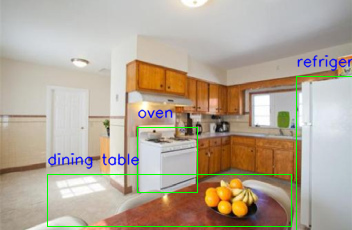

In [52]:
cv2_imshow(igg)

In [47]:
bboxes

tensor([[296.8349,  76.6260, 352.0000, 230.0000],
        [137.9991, 127.7945, 197.8559, 192.3149],
        [ 47.7723, 174.8137, 291.8063, 226.5561],
        [201.0728, 182.3305, 256.9844, 220.3998],
        [ 49.4557,  85.3956,  83.2604, 164.0247],
        [188.0019, 128.9862, 229.9613, 177.4538],
        [109.9328,  95.1930, 132.2697, 165.9789],
        [ 96.1544, 103.4670, 113.3665, 178.7996],
        [ 71.0473,  87.6159,  93.4132, 168.6716],
        [ 25.6719, 207.0688,  96.7011, 229.5757],
        [ 45.0322, 201.5023, 115.4670, 227.5960],
        [125.2602, 133.3299, 161.7572, 192.3158],
        [211.5011, 186.0791, 229.8493, 202.1069],
        [  9.2319, 165.0959, 203.5730, 219.5669],
        [ 34.0497,  89.2359,  63.7728, 159.7142],
        [261.5966, 187.0260, 309.9577, 230.0000],
        [296.6909,  86.3788, 330.2977, 167.8974],
        [231.0472, 201.8315, 249.0667, 217.0303],
        [224.5060, 177.7315, 299.8907, 228.7035],
        [204.1436, 183.4686, 235.0497, 207.6629],
